#Obesity Level Prediction Using Lifestyle and Behavioral Data

### Project Background

Obesity is a growing global health challenge in both developed and developing countries, with rates nearly tripling since 1975. Obesity contributes to major conditions such as cardiovascular disease, type 2 diabetes, and certain cancers.  
Traditional risk-assessment tools like BMI have been put in place however they often overlook complex interactions among lifestyle, diet, and physical activity.  

Machine learning offers more advanced predictive capabilities by identifying hidden patterns in large datasets, though many models remain limited by their “black box” nature, which reduces transparency for clinicians and patients.

According to public health studies obesity cases are influenced by demographic, behavioral, and lifestyle factors. Early identification of obesity risk levels can support preventive healthcare interventions and policy planning.

This project aims to:

   - Develop a machine learning model that predicts an individual’s obesity category (NObeyesdad) based on demographic attributes, dietary habits, physical activity, and lifestyle behaviors.
  - The model will help identify high-risk individuals and demonstrate how data-driven approaches can support healthcare decision-making



### Project scope will include:  
Data clean up - check for any missingness  
EDA analysis  
Feature engeneering
Modeling  
Evaluation  
Hyperparameter tuning  


In [1]:
# General Libraries

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Data Explotation libraries
import matplotlib.pyplot as plt #Visualization
import seaborn as sns #Advanced Visualization
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
# Data modelling libraries
from sklearn.impute import SimpleImputer
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import f1_score

In [2]:
df1= pd.read_csv("/content/ObesityDataSet_raw_and_data_sinthetic.csv")

In [3]:
df1.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


#### Background of the Dataset  
The dataset used was sourced from machine learning repository website, it includes the forllowing features:  
- NObesity (Obesity Level) - Target variable that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III.  
- Age : numerical variable; indicates age of participants
- Gender : Categorical;  biological sex of individual  
- Height : Numerical ; Height measured in meters  
- Weight : Numerical ; participant weight captured in kilograms  
- family history with overweight: categorical ; Whether close relatives have obesity or overweight history
- FAVC (Frequent Consumption of High-Calorie Foods) : Categorical; Regular consumption of high-calorie, processed foods  
- FCVC (Frequency of Vegetable Consumption) : Numerical; How often the person eats vegetables 1- rarely,2- sometimes 3- frequently;  
- NCP (Number of Main Meals per Day):  Numerical 1-3; Meal frequency.  
- CAEC (Consumption of Food Between Meals):  Categorical (no, Sometimes, Frequently, Always); Snacking frequency
- Smoke: categorical: Whether the individual smokes  
- CH2O (Daily Water Intake): Numerical  
- SCC (Monitors Daily Caloric Intake?): Categorical; Whether the individual tracks calories.
- FAF (Physical Activity Frequency): Numerical;0=none,1=low,2=moderate,3=high
- TUE (Time Using Technology Devices):Numerical  
- CALC (Alcohol Consumption): Categorical; Frequency of alcohol intake.  
- MTRANS (Mode of Transportation): Categorical  




### Data Cleaning and Preparation

#### a. Check for Missingness and Duplicates

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

- Dataset has 17 columns and 2111 entries with no missing values identified

In [5]:
df1[df1.duplicated()]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
209,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,Female,16.0,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
460,Female,18.0,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
467,Male,22.0,1.74,75.0,yes,yes,3.0,3.0,Frequently,no,1.0,no,1.0,0.0,no,Automobile,Normal_Weight
496,Male,18.0,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


In [6]:
#drop duplicates since they dont add value and distort model training
df1_clean = df1.drop_duplicates()

#### b. Check for data types and inconsistencies

In [7]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   object 
 12  FAF                             2087 no

In [8]:
#convert category columns whose data type is currently 'object' to datatype 'category'
cat_cols = df1_clean.select_dtypes(include="object").columns
df1[cat_cols] = df1[cat_cols].astype("category")

In [9]:
# check for inconsistencies (manual check) weight, age , height should be within expected standard ranges
df1_clean.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


- No inconsistencies identified
###check for spelling errors in categorical columns that dont belong.

In [10]:
df1['NObeyesdad'].unique()

['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II', 'Obesity_Type_III']
Categories (7, object): ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II',
                         'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']

Underweight = less than 18.5  
Normal weight = 18.5-24.9  
Overweight = 25.9 - 29.9  
Obesity I = 30.0- 34.9  
Obesity II = 35.0- 39.9



In [11]:
df1['CALC'].unique()

['no', 'Sometimes', 'Frequently', 'Always']
Categories (4, object): ['Always', 'Frequently', 'Sometimes', 'no']

In [12]:
df1['CAEC'].unique()

['Sometimes', 'Frequently', 'Always', 'no']
Categories (4, object): ['Always', 'Frequently', 'Sometimes', 'no']

In [13]:
df1['MTRANS'].unique()

['Public_Transportation', 'Walking', 'Automobile', 'Motorbike', 'Bike']
Categories (5, object): ['Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking']

### EDA

#### Univariate analysis

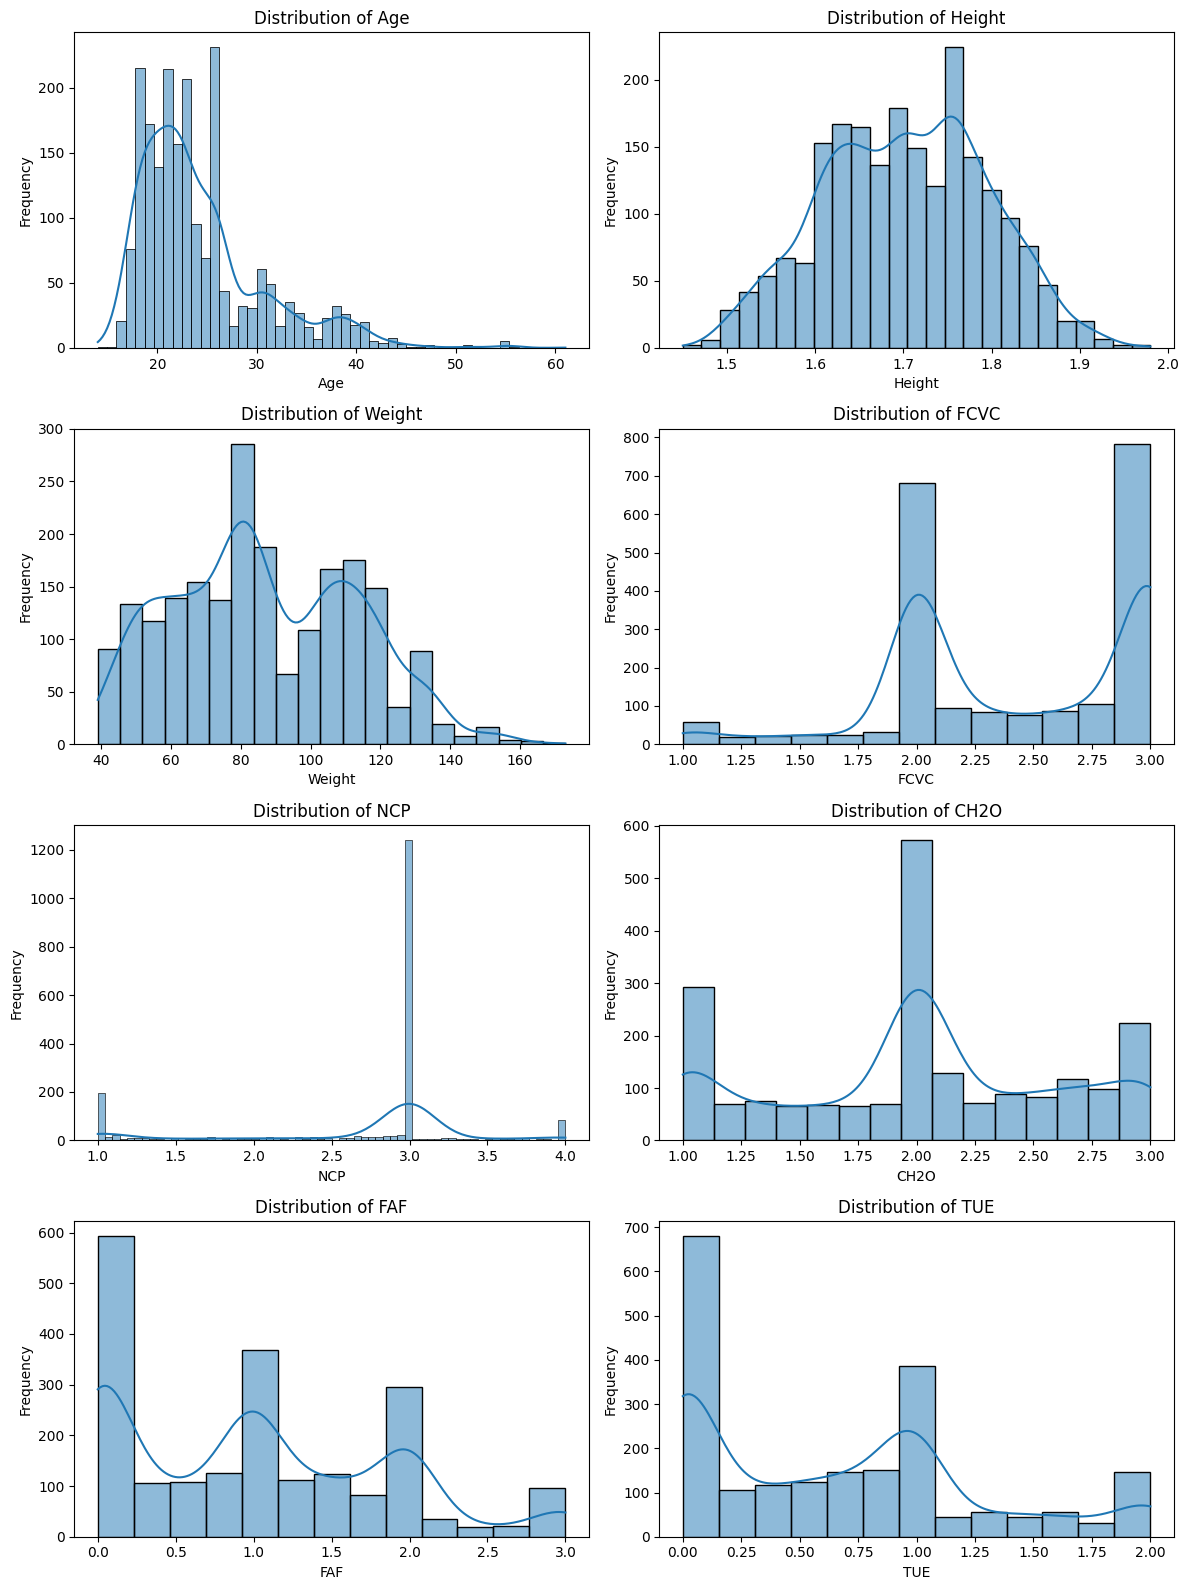

In [14]:

num_cols = ["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))
axes = axes.flatten()


for i, col in enumerate(num_cols):
    sns.histplot(df1_clean[col], kde=True, ax=axes[i], color=None)
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

From visuals above:
- most participants have limite physical activity,take 3 meals per day and are seen to have a body weight of 80kgs

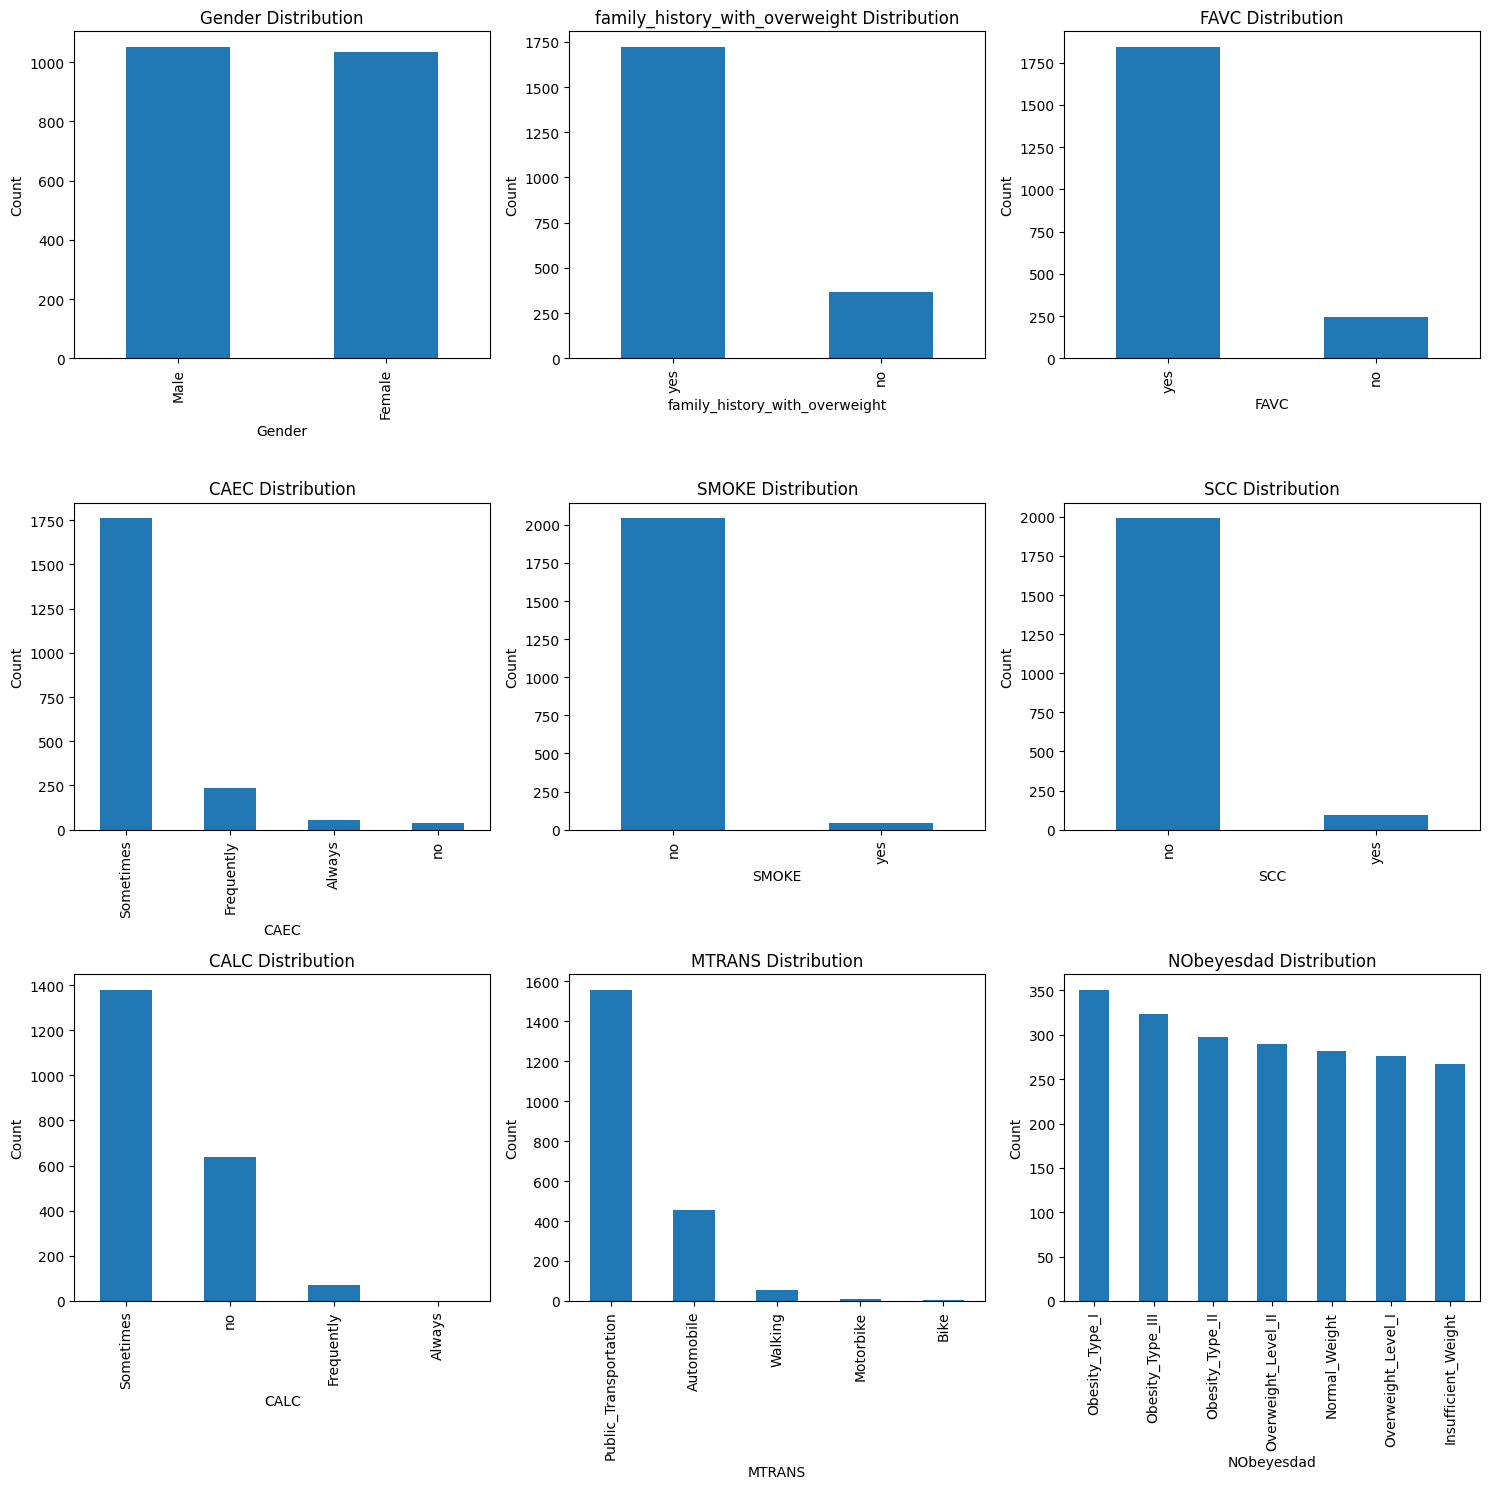

In [15]:
cat_cols = ["Gender", "family_history_with_overweight", "FAVC", "CAEC",
            "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    df1_clean[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f"{col} Distribution")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

- Most participants have family history with overweight, consume more calories and consume alcohol.  
- Nobeysdad distribution above shows varrying class frequencies therefore a mild class imbalance

- The height distribution is approximately normal, with most individuals clustered around the mean and few extreme values. This suggests limited variability in stature across the dataset

#### Biveriate Analysis

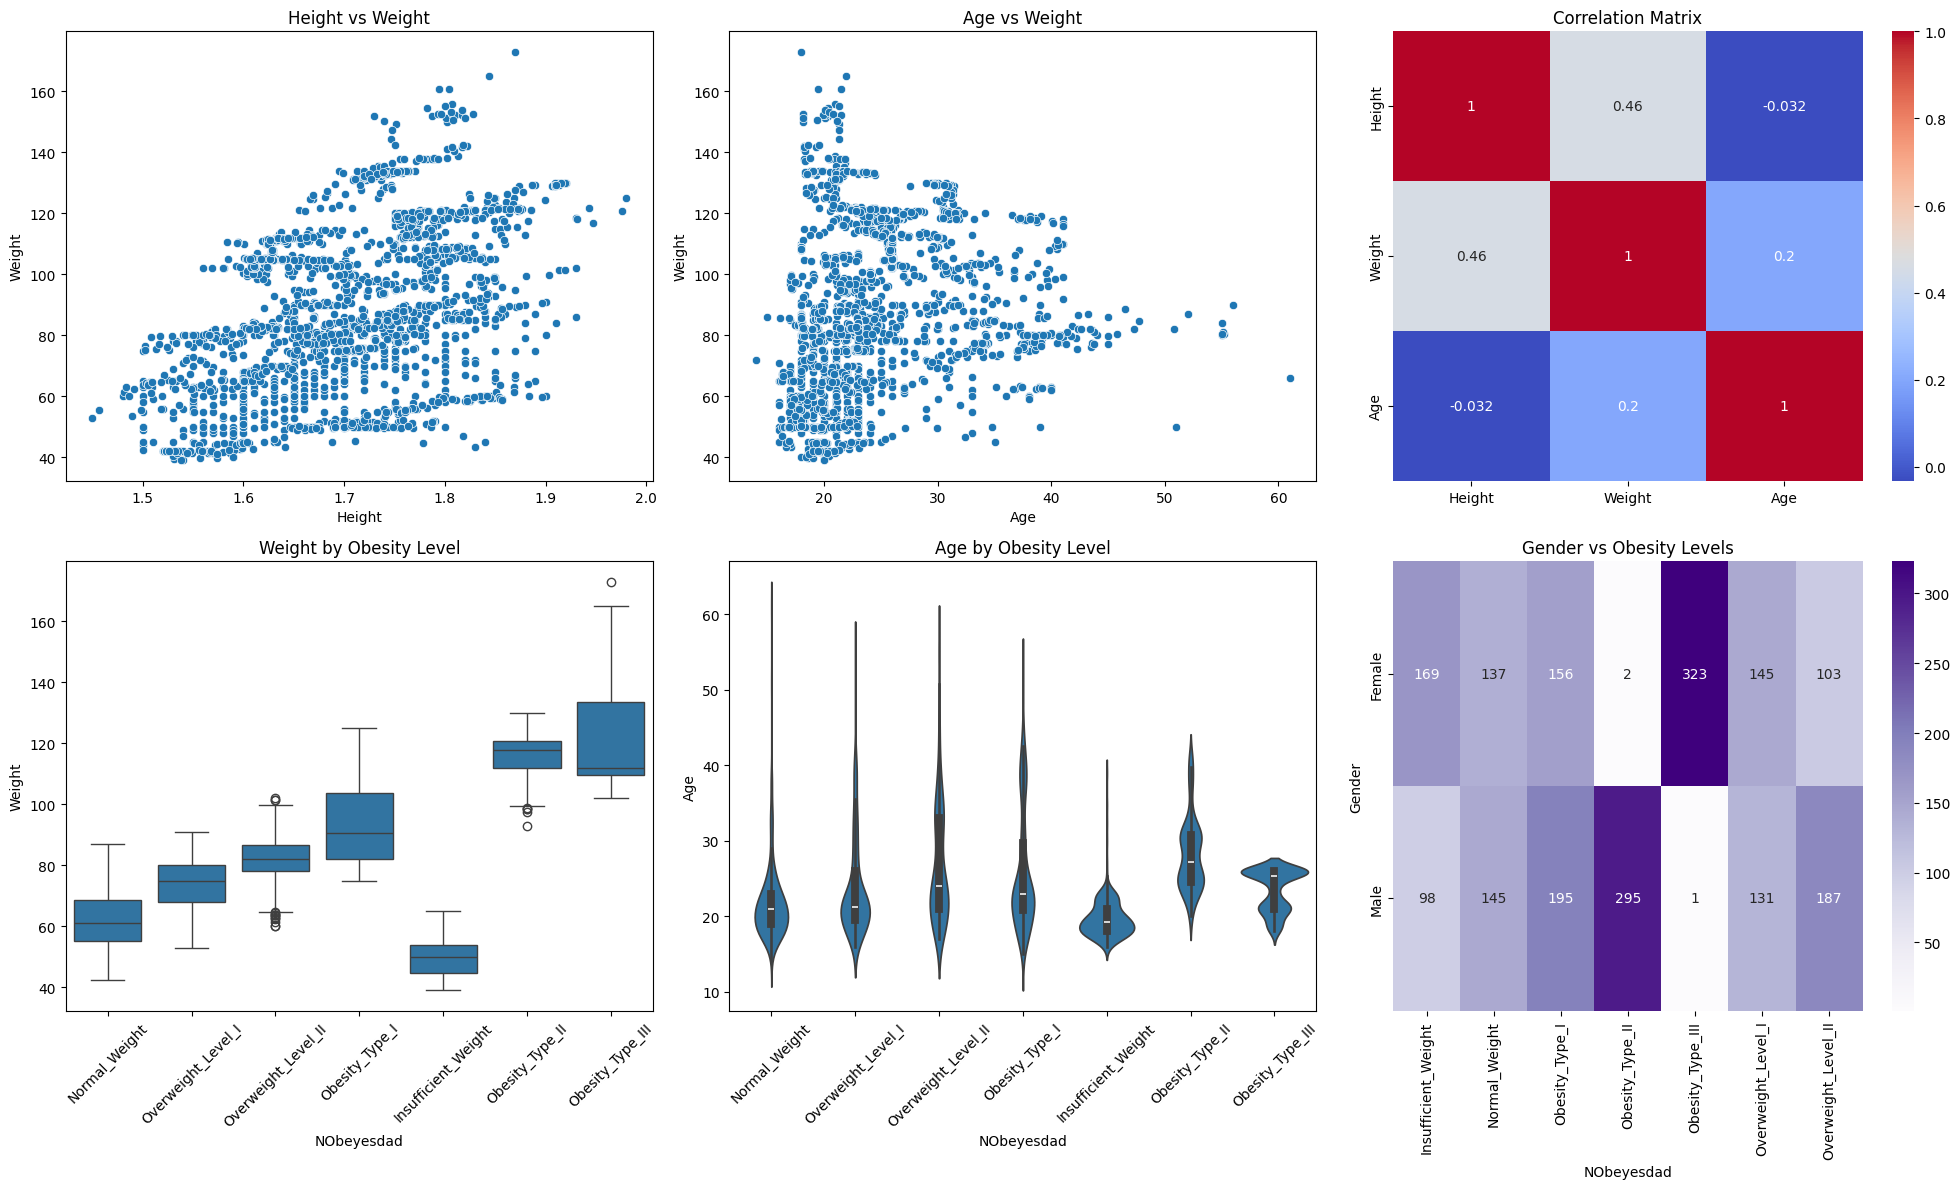

In [16]:

fig, axes = plt.subplots(2, 3, figsize=(20, 12))


#Height vs Weight
sns.scatterplot(data=df1_clean, x="Height", y="Weight", ax=axes[0, 0])
axes[0, 0].set_title("Height vs Weight")

# Age vs Weight
sns.scatterplot(data=df1_clean, x="Age", y="Weight", ax=axes[0, 1])
axes[0, 1].set_title("Age vs Weight")

# Correlation Heatmap
sns.heatmap(
    df1_clean[["Height", "Weight", "Age"]].corr(),
    annot=True,
    cmap="coolwarm",
    ax=axes[0, 2]
)
axes[0, 2].set_title("Correlation Matrix")

#Weight vs NObeyesdad
sns.boxplot(data=df1_clean, x="NObeyesdad", y="Weight", ax=axes[1, 0])
axes[1, 0].set_title("Weight by Obesity Level")
axes[1, 0].tick_params(axis='x', rotation=45)

# Age vs NObeyesdad
sns.violinplot(data=df1_clean, x="NObeyesdad", y="Age", ax=axes[1, 1])
axes[1, 1].set_title("Age by Obesity Level")
axes[1, 1].tick_params(axis='x', rotation=45)


# Crosstab Heatmap: Gender vs Obesity Level
ct = pd.crosstab(df1_clean["Gender"], df1_clean["NObeyesdad"])
sns.heatmap(ct, annot=True, cmap="Purples", fmt="d", ax=axes[1, 2])
axes[1, 2].set_title("Gender vs Obesity Levels")

plt.tight_layout()
plt.show()


- Type_ii obesity has averagely higher weight compared to type_iii and the rest
- Most Overweight and obese individuals are more likely to be between ages 20-30 years.  
- Female individuals have more obese than male ones.

#### Correlation Analysis

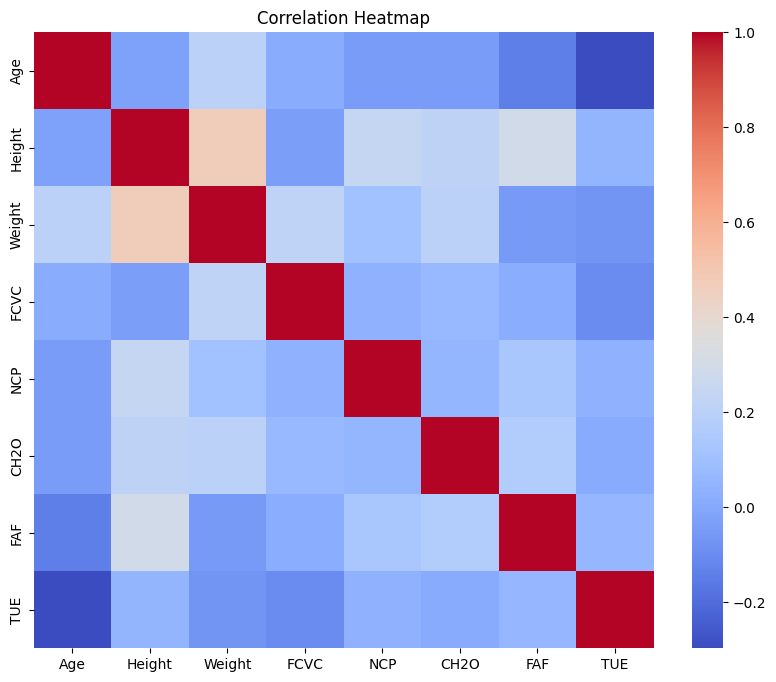

In [17]:
num_df = df1.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
sns.heatmap(num_df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [18]:
# drop prediction column
y = df1_clean.NObeyesdad

X = df1_clean.drop(columns=['NObeyesdad'])

In [19]:
features_names= X.columns
target_names = df1_clean['NObeyesdad'].unique()

### Feature Encoding

- Since we had a mixture of norminal and ordinal categories in the dataset features, I considered both label and one hot Encoding  


In [21]:
Label_Encoders = {}
for column in X.columns:
  if X[column].dtype == 'object':
    Label_Encoders[column]= LabelEncoder()
    X[column]= Label_Encoders[column].fit_transform(X[column])

In [22]:
df1_clean.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### Split data Into test and train sets

In [23]:
from  sklearn.model_selection import train_test_split

In [24]:
#split data into training and testing set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [25]:
X_train.shape

(1669, 16)

In [26]:
X_train.dtypes

,0
Gender,int64
Age,float64
Height,float64
Weight,float64
family_history_with_overweight,int64
FAVC,int64
FCVC,float64
NCP,float64
CAEC,int64
SMOKE,int64


### Classification Methods

1. Bernoulli Naive Bayes

In [27]:
from sklearn.metrics import accuracy_score


In [28]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [29]:
model.fit(X_train,y_train)

GaussianNB()

In [30]:
model.score(X_train, y_train)

0.6171360095865788

In [31]:
#train the model
pred_train= model.predict(X_train)

In [32]:
model_train_score = accuracy_score(pred_train,y_train)*100
model_train_score

61.71360095865788

In [33]:
#test model with test data
pred_test= model.predict(X_test)

In [34]:
#test accuracy of the predicted model
model_test_score= accuracy_score(pred_test,y_test)*100
model_test_score

60.28708133971292

- Hyperparameter tuning wasn't done on Naive Bayes due to its probabilistic nature

2. Decission Trees

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [36]:
#create the model
dt_clf = DecisionTreeClassifier(random_state=0)

In [37]:
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [38]:
#train the model
pred_train= dt_clf.predict(X_train)

In [39]:
#test accuracy of the model
dt_clf_train_score = accuracy_score(pred_train,y_train)*100
dt_clf_train_score

100.0

In [40]:
#test model with test data
pred_test= dt_clf.predict(X_test)

In [41]:
#test accuracy of the predicted model
dt_clf_test_score= accuracy_score(pred_test,y_test)*100
dt_clf_test_score

93.0622009569378

#### Hyperparameter tuning of decision tree model

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
param_grid = {
    'criterion' : ['gini','entropy'],
    'max_depth' : [None,5,10,15,20],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
    'max_features': ['auto', 'sqrt','log2'],
    'random_state': [42]
}



In [44]:
clf_dt = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5,scoring='accuracy')

In [45]:
#fit model to training data
clf_dt.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'random_state': [42]},
             scoring='accuracy')

In [46]:
#print best hyperparameters
print("Best hyperparameters:", clf_dt.best_params_)

Best hyperparameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}


In [47]:
#evaluate model with best parameters on the test set
best_clf= clf_dt.best_estimator_
dt_train_accuracy= best_clf.score(X_train,y_train)
dt_test_accuracy= best_clf.score(X_test,y_test)

print(f"Train accuraccy with best hyperparameters: {dt_train_accuracy}")
print(f"Test accuraccy with best hyperparameters: {dt_test_accuracy}")

Train accuraccy with best hyperparameters: 1.0
Test accuraccy with best hyperparameters: 0.8397129186602871


In [48]:
clf_dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=15,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)

clf_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=15, max_features='sqrt', random_state=42)

In [49]:
#train model
pred_train=clf_dt.predict(X_train)

In [50]:
#check for accuracy
dt_train_accurary2=accuracy_score(pred_train,y_train)*100
dt_train_accurary2

98.7417615338526

In [51]:
#test model with test data
pred_test2 =clf_dt.predict(X_test)

In [52]:
dt_test_accurary2=accuracy_score(pred_test2,y_test)*100
dt_test_accurary2

82.29665071770334

### Plot the decision tree

In [53]:
from sklearn.tree import plot_tree

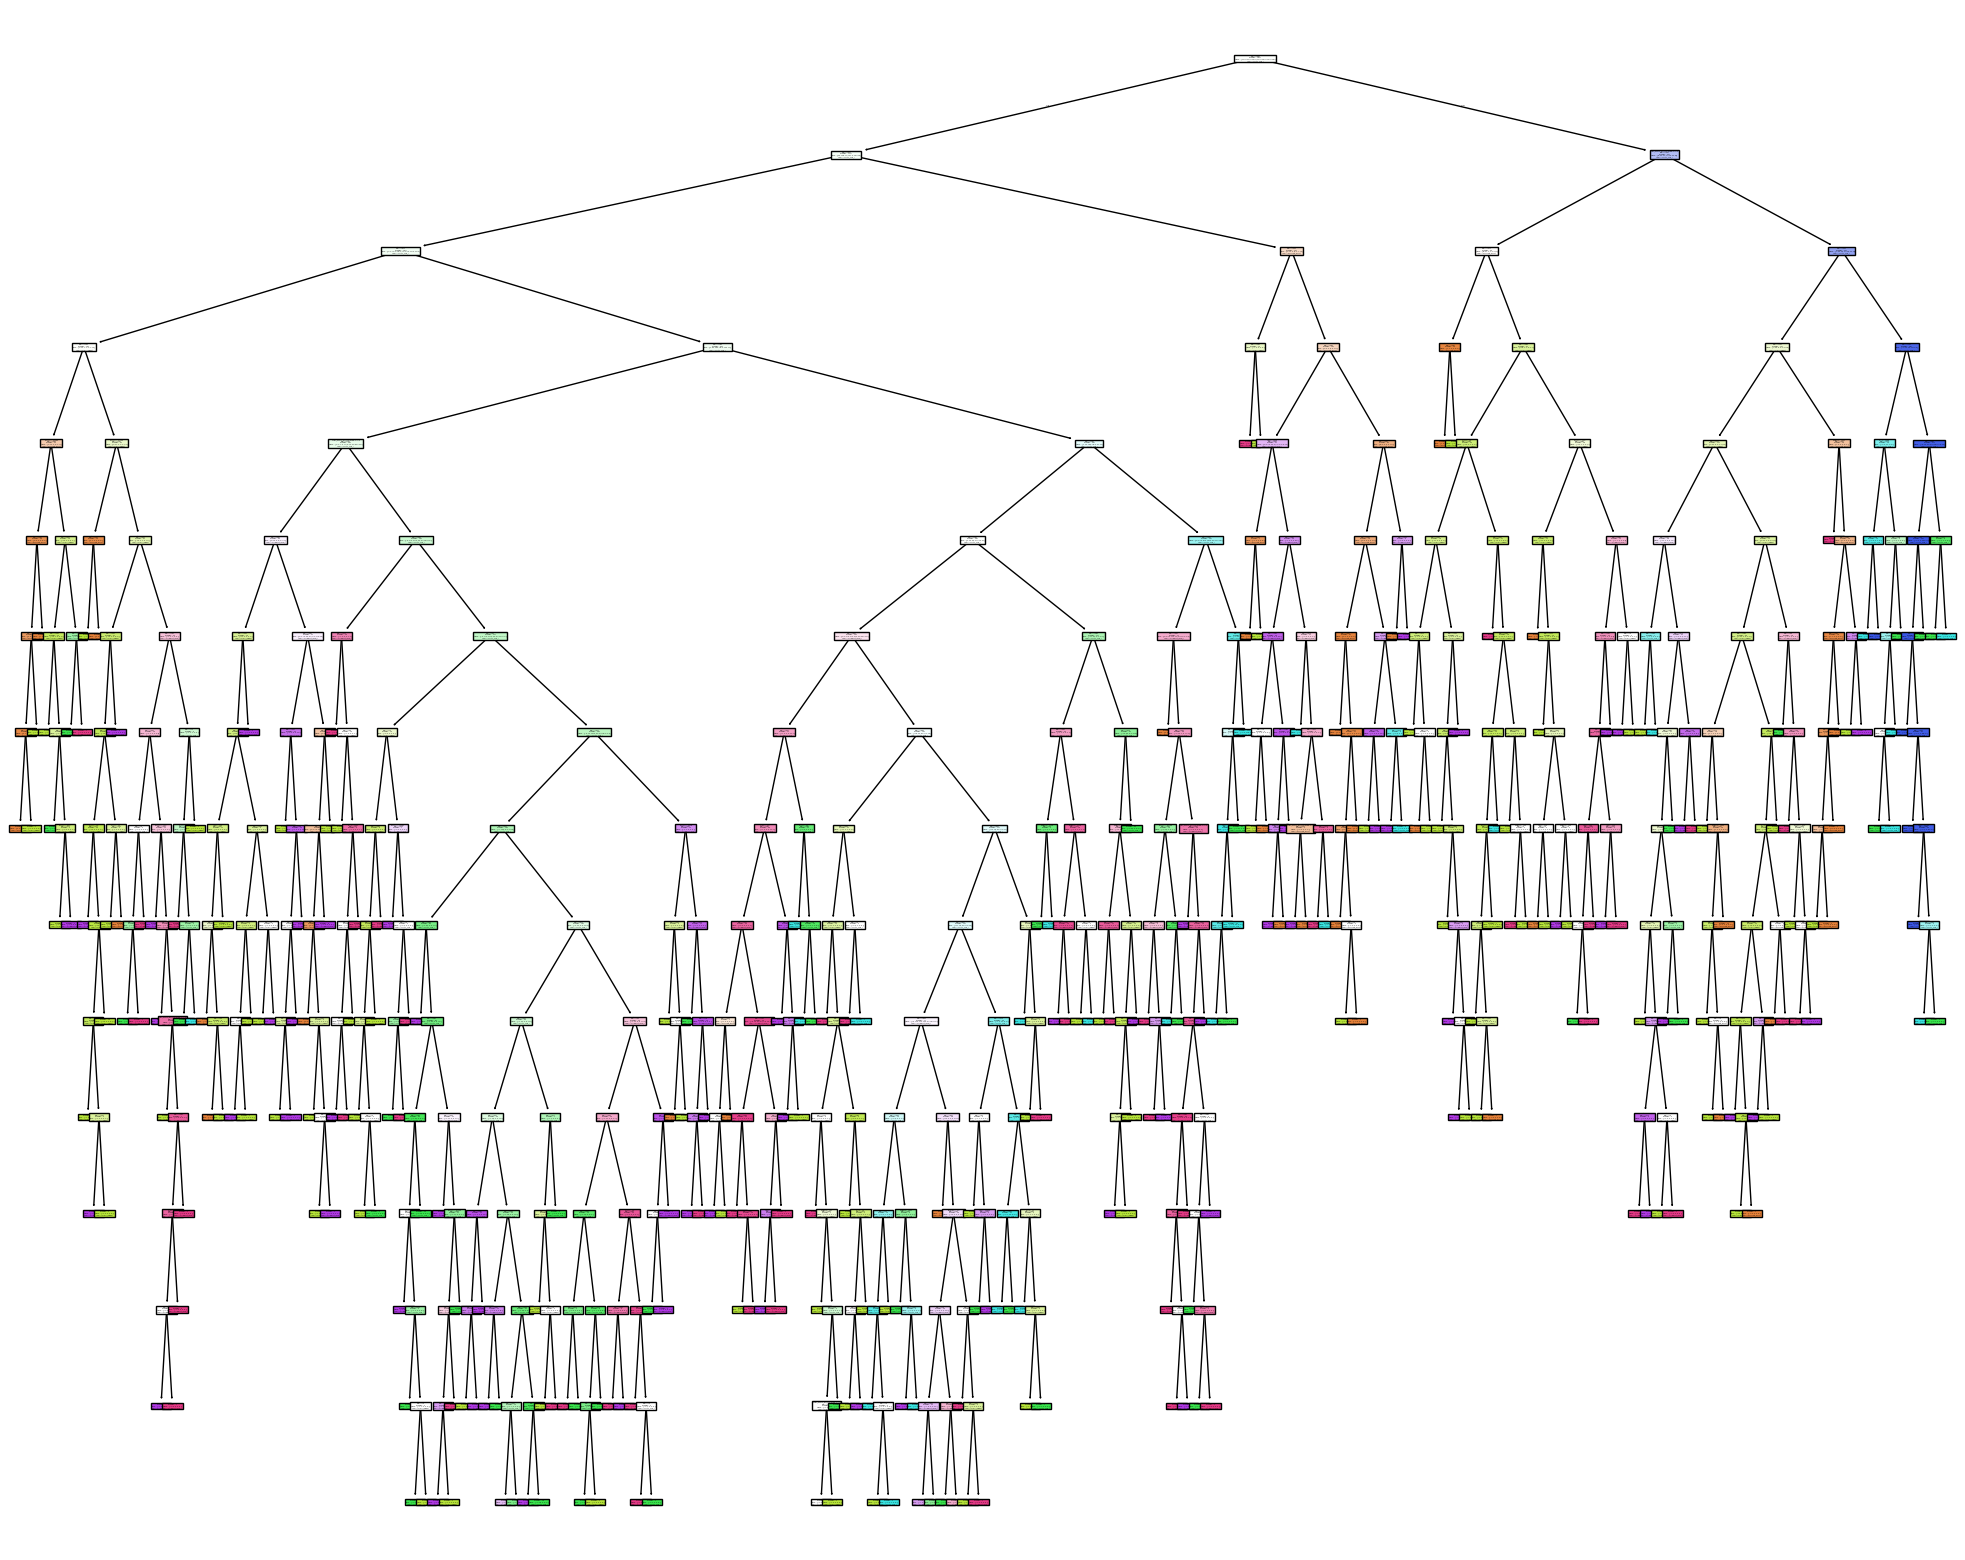

In [54]:

plt.figure(figsize=(25, 20))
plot_tree(
    clf_dt,
    feature_names=X_train.columns,
    class_names=clf_dt.classes_,
    filled=True
)
plt.show()

- The decision tree indicates a fit of obesity data very well, though has a challange of reduced interpretability since it is wide and quite detailed.
- Leaf nodes are small with many splits indicating that the max_depth is not limited

### Classification Report

In [55]:
y_pred=clf_dt.predict(X_test)
print(classification_report(y_test,y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.88      0.78      0.83        46
      Normal_Weight       0.66      0.73      0.69        51
     Obesity_Type_I       0.83      0.77      0.80        75
    Obesity_Type_II       0.95      0.90      0.93        70
   Obesity_Type_III       1.00      1.00      1.00        60
 Overweight_Level_I       0.66      0.84      0.74        56
Overweight_Level_II       0.80      0.72      0.75        60

           accuracy                           0.82       418
          macro avg       0.83      0.82      0.82       418
       weighted avg       0.83      0.82      0.83       418



- Above report indicates balanced performance accross classes. accuracy is at 82%, macro F1 at around 82 as well  
- Obesity type ii and iii are best perfoming classes while normal weight class is poor this may arise due to conffusion errors.


### Apply a confussion matrix to asses where confussion might be occuring within the classes

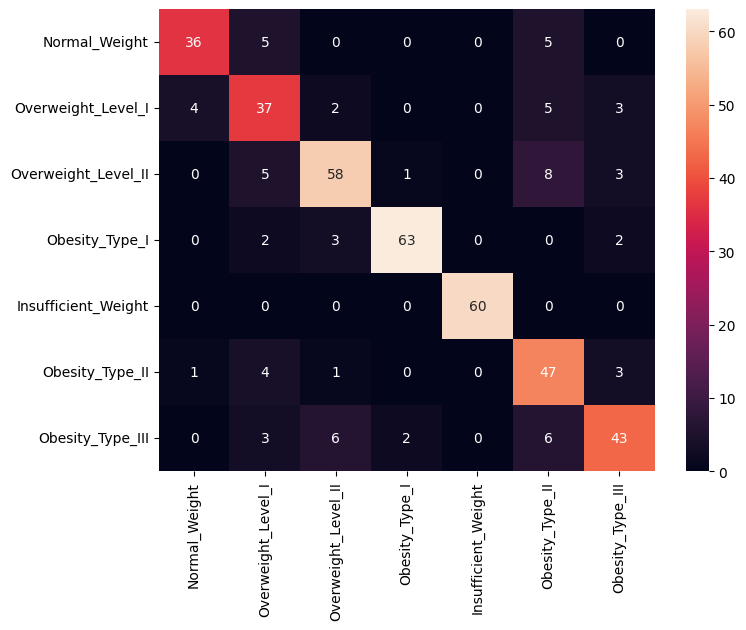

In [56]:
#confusion matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
ax=sns.heatmap(cm,annot=True,fmt='d',xticklabels=target_names, yticklabels=target_names)
plt.show()

- 10 normal weight individuals were predicted as overweight  and obese
- overweight level 1 shows most confussion this can be because it lies between obesity and normal weight.  
- Severe obesity and underweight categories are classified with high accuracy, demonstrating the model’s ability to capture distinct physiological patterns.  
- Model shows high variance with sharp decision boundaries

### Random Forest

- While the decision tree achieved high accuracy, it exhibited sensitivity to class boundaries, particularly between normal and overweight categories. To address variance and improve generalization, a Random Forest classifier was employed. By aggregating multiple decision trees, the model reduced overfitting and improved robustness, especially for borderline obesity classes.

In [57]:
#initialize the randomForest classifier
rfc= RandomForestClassifier(n_estimators=100,random_state=42)

In [58]:
#fit classifier with training set
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [59]:
#train model
pred_train=rfc.predict(X_train)

In [60]:
rfc_train_score=accuracy_score(pred_train, y_train)*100
rfc_train_score

100.0

In [61]:
pred_test= rfc.predict(X_test)

In [62]:
rfc_test_score=accuracy_score(pred_test, y_test)*100
rfc_test_score

95.45454545454545

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
rfc_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['log2'],
    'random_state': [42],
    'criterion': ['gini', 'entropy', 'log_loss']
}

In [65]:
#increse parameter performance
rfc_grid = GridSearchCV(RandomForestClassifier(),rfc_param_grid,cv=5)
rfc_grid.fit(X_train,y_train)
rfc_best_params=rfc_grid.best_params_
rfc_best_score=rfc_grid.best_score_

print("RandomForestClassifier best parameter: ", rfc_best_params)
print("RandomForestClassifier best score: ", rfc_best_score)


RandomForestClassifier best parameter:  {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 300, 'random_state': 42}
RandomForestClassifier best score:  0.9502670335005664


In [66]:
rfc= RandomForestClassifier(n_estimators=200,criterion = 'entropy',max_features= 'log2',random_state=42)

In [67]:
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_features='log2',
                       n_estimators=200, random_state=42)

In [68]:
pred_train=rfc_grid.predict(X_train)

In [69]:
rfc_train_accuracy= accuracy_score(pred_train,y_train)*100
rfc_train_accuracy

100.0

In [70]:
pred_test=rfc_grid.predict(X_test)

In [71]:
rfc_test_accuracy= accuracy_score(pred_test,y_test)*100
rfc_test_accuracy

96.65071770334929

### RandomForest Classification Report

In [72]:
y_pred= rfc.predict(X_test)
print(classification_report(y_test,y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.96      0.98        46
      Normal_Weight       0.84      0.96      0.90        51
     Obesity_Type_I       0.99      0.97      0.98        75
    Obesity_Type_II       0.99      0.99      0.99        70
   Obesity_Type_III       1.00      1.00      1.00        60
 Overweight_Level_I       0.95      0.93      0.94        56
Overweight_Level_II       0.96      0.92      0.94        60

           accuracy                           0.96       418
          macro avg       0.96      0.96      0.96       418
       weighted avg       0.96      0.96      0.96       418



#### Draw a confusion matrix to display any misclassifications

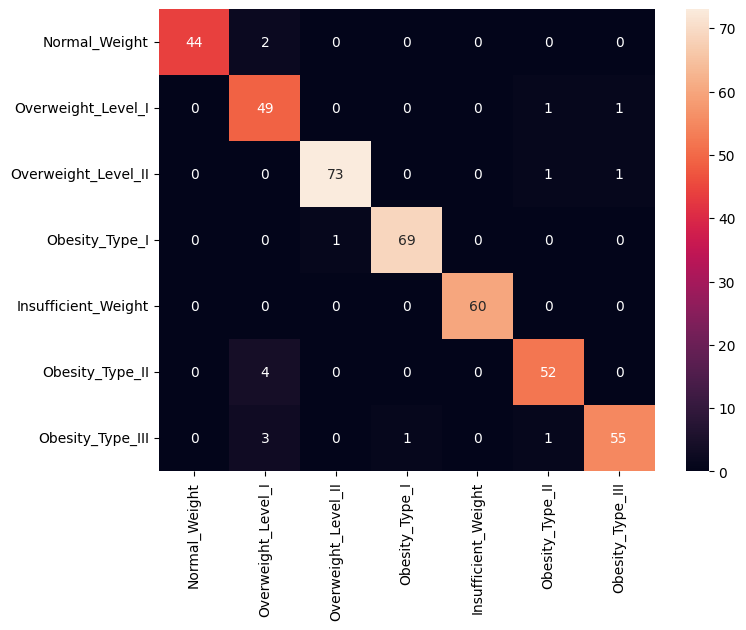

In [73]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
ax=sns.heatmap(cm,annot=True,fmt='d',xticklabels=target_names, yticklabels=target_names)
plt.show()

- The model is strong and well generalized but still has few misclassifications  


### Gradient Boosting

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

In [76]:
gb_clf= GradientBoostingClassifier(n_estimators=100)

In [77]:
gb_clf.fit(X_train,y_train)

GradientBoostingClassifier()

In [78]:
pred_train=gb_clf.predict(X_train)

In [79]:
gb_clf_train_score= accuracy_score(pred_train,y_train)*100
gb_clf_train_score

100.0

In [80]:
pred_test=gb_clf.predict(X_test)

In [81]:
gb_clf_test_score= accuracy_score(pred_test,y_test)*100
gb_clf_test_score

97.1291866028708

In [82]:
param_grid = {
    'n_estimators' : [50,100,200],
    'learning_rate': [0.01,0.1,0.5],
    'max_depth' : [3,5,7],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

In [83]:
from sklearn.model_selection import RandomizedSearchCV

In [84]:
gb_random = RandomizedSearchCV(
    GradientBoostingClassifier(),
    param_distributions=param_grid,
    n_iter=30,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

In [85]:
gb_random.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.5],
                                        'max_depth': [3, 5, 7],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy', verbose=2)

In [86]:
gb_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 7,
 'learning_rate': 0.5}

In [87]:

gb_random.best_score_

np.float64(0.9700490910071748)

In [88]:
#evaluate model
train_accuracy = gb_random.score(X_train,y_train)
test_accuracy = gb_random.score(X_test,y_test)
print(f"train accuracy with best hyperparameters: {train_accuracy}")
print(f"test accuracy with best hyperparameters: {test_accuracy}")

train accuracy with best hyperparameters: 1.0
test accuracy with best hyperparameters: 0.9736842105263158


- GridSearchCV took longer due to the large hyperparameter space and the sequential nature of Gradient Boosting. To improve computational efficiency,RandomizedSearchCV was used.

In [89]:
clf_gb=GradientBoostingClassifier(learning_rate=0.5,max_depth=7,min_samples_leaf=4,min_samples_split=2,n_estimators=200)

In [90]:
clf_gb.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=7, min_samples_leaf=4,
                           n_estimators=200)

In [91]:
pred_train=clf_gb.predict(X_train)

In [92]:
gb_train_accuracy=accuracy_score(pred_train,y_train)
gb_train_accuracy

1.0

In [93]:
pred_test= clf_gb.predict(X_test)

In [94]:
gb_test_accuracy=accuracy_score(pred_test,y_test)
gb_test_accuracy

0.9736842105263158

#### Gradient boosting classification report

In [95]:
y_pred=clf_gb.predict(X_test)
print(classification_report(y_test,y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.98      0.99        46
      Normal_Weight       0.96      0.92      0.94        51
     Obesity_Type_I       0.99      0.96      0.97        75
    Obesity_Type_II       0.99      1.00      0.99        70
   Obesity_Type_III       1.00      1.00      1.00        60
 Overweight_Level_I       0.93      0.96      0.95        56
Overweight_Level_II       0.95      0.98      0.97        60

           accuracy                           0.97       418
          macro avg       0.97      0.97      0.97       418
       weighted avg       0.97      0.97      0.97       418



#### Confusion matrix for Gradient boosting model

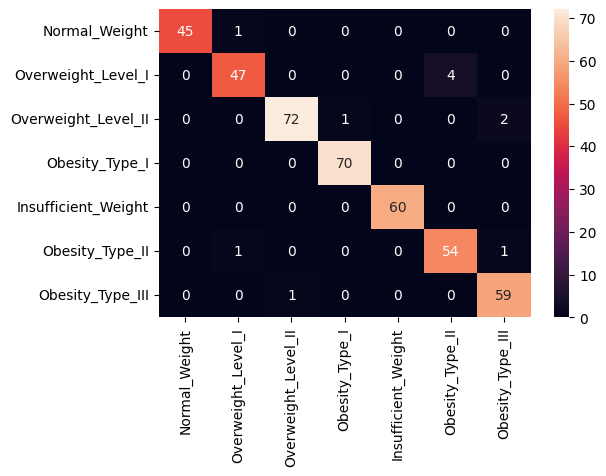

In [96]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
ax=sns.heatmap(cm,annot=True,fmt='d',xticklabels=target_names, yticklabels=target_names)
plt.show()

- Compared to random forest and other classification models used , gradient boosting is performing better with very few  misclassifications.

### ROC Curve for Gradient Boosting

In [97]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

In [98]:
#Binarize test class labels
classes = y_test.unique()
y_test_bin = label_binarize(y_test, classes=classes)

In [99]:
classes = gb_random.best_estimator_.classes_

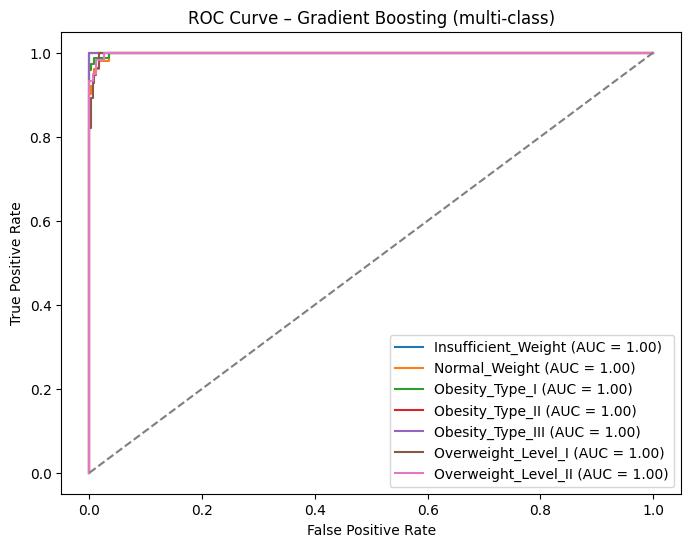

In [100]:
y_test_bin = label_binarize(y_test, classes=classes)
y_prob = gb_random.best_estimator_.predict_proba(X_test)

plt.figure(figsize=(8,6))

for i, class_name in enumerate(classes):
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_name} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Gradient Boosting (multi-class)')
plt.legend(loc='lower right')
plt.show()

### Feature importance selection

<Axes: >

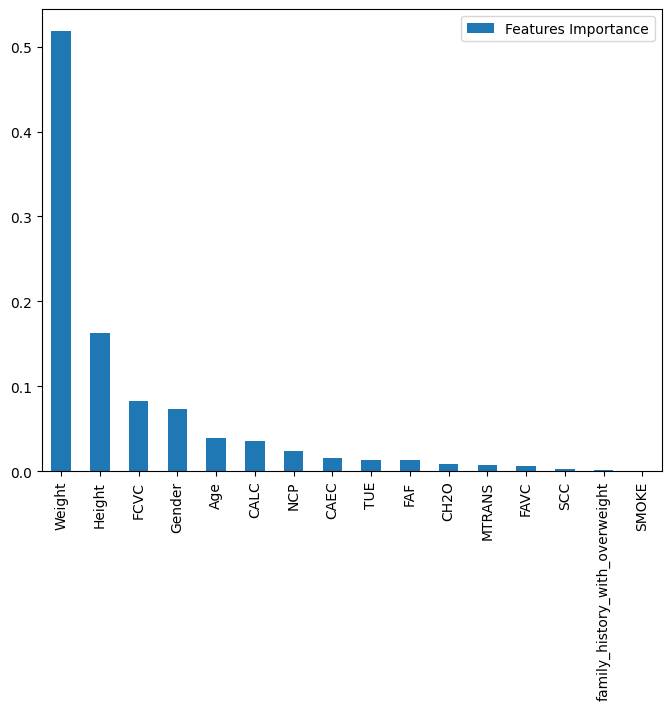

In [101]:
feat_importance=pd.DataFrame(clf_gb.feature_importances_,index=features_names,columns=["Features Importance"])
feat_importance.sort_values(by='Features Importance', ascending=False,inplace=True)
feat_importance.plot(kind='bar',figsize=(8,6))

#### Threshold corresponding to the maximum difference between tpr and fpr

In [102]:
optimal_index= np.argmax(tpr-fpr)

In [104]:
optimal_threshold= thresholds[optimal_index]
optimal_threshold

np.float64(0.0009794537715292317)

In [105]:
y_pred_new_threshold= (y_prob >=optimal_threshold).astype(int)

### Model Selection

#### Display of general model scores

In [106]:
score_data={
    'Model':['Naive Bayes','Decision Tree', 'Random Forest','Gradient Boosting'],
    'Train Score': [model_train_score,dt_clf_train_score,rfc_train_score,gb_clf_train_score],
    'Test Score': [model_test_score,dt_clf_test_score,rfc_test_score,gb_clf_test_score],
    'Tuned Train Score': [model_train_score,dt_train_accurary2,rfc_train_accuracy,gb_train_accuracy],
    'Tuned Test Score': [model_test_score, dt_test_accurary2,rfc_test_accuracy,gb_test_accuracy]

}

#scores dataframe
scores_df= pd.DataFrame(score_data)

#sort by scores
sorted_scores_df=scores_df.sort_values(by='Tuned Test Score',ascending=False)

sorted_scores_df

,Model,Train Score,Test Score,Tuned Train Score,Tuned Test Score
2,Random Forest,100.000000,95.454545,100.000000,96.650718
1,Decision Tree,100.000000,93.062201,98.741762,82.296651
0,Naive Bayes,61.713601,60.287081,61.713601,60.287081
3,Gradient Boosting,100.000000,97.129187,1.000000,0.973684


### Save the best model to a file

In [107]:
import joblib

joblib.dump(clf_gb, 'gradient_boosting_model.pkl')


['gradient_boosting_model.pkl']

### Scores interpretation  
- Decision tree- has overfitting and showed sensitivity to hyperparameters  
- Naive Bayes- has low accuracy, underfitted  
- Random Forest- displayed high accuracy , robust to noise and stable  
- Gradient Boosting- Highest accuracy level, best generalization with excellent biase variance trade-off

###Conclusion

- Among all evaluated models, Gradient Boosting achieved the highest tuned test accuracy (97.3%), indicating superior generalization performance. Although Random Forest also performed strongly, Gradient Boosting was selected as the final model due to its ability to capture complex nonlinear relationships in the data.